In [51]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
from imutils import paths
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [2]:
import tensorflow as tf 
from tensorflow import keras 
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten, Dropout,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [3]:
data_directory = 'E:/Northeastern Grad Studies/Fall 22 - Semester 1/SML - Prof. Honyang Zang/german_roadsign/'
test_path = "E:/Northeastern Grad Studies/Fall 22 - Semester 1/SML - Prof. Honyang Zang/german_roadsign/Test/"

In [5]:
train_dir= 'E:/Northeastern Grad Studies/Fall 22 - Semester 1/SML - Prof. Honyang Zang/german_roadsign/Train'
len(os.listdir(train_dir))
# Therefore there are 42 classes present in Training dataset 

43

In [8]:
len(os.listdir(test_path))

12630

In [5]:
dic={}
for i in os.listdir(train_dir):
    train_class = len(os.listdir(train_dir+'/'+i))
    dic[int(i)] =  train_class
    
dic = dict(sorted(dic.items()))
print(dic)

{0: 210, 1: 2220, 2: 2250, 3: 1410, 4: 1980, 5: 1860, 6: 420, 7: 1440, 8: 1410, 9: 1470, 10: 2010, 11: 1320, 12: 2100, 13: 2160, 14: 780, 15: 630, 16: 420, 17: 1110, 18: 1200, 19: 210, 20: 360, 21: 330, 22: 390, 23: 510, 24: 270, 25: 1500, 26: 600, 27: 240, 28: 540, 29: 270, 30: 450, 31: 780, 32: 240, 33: 689, 34: 420, 35: 1200, 36: 390, 37: 210, 38: 2070, 39: 300, 40: 360, 41: 240, 42: 240}


In [17]:
sum(dic.values())

39209

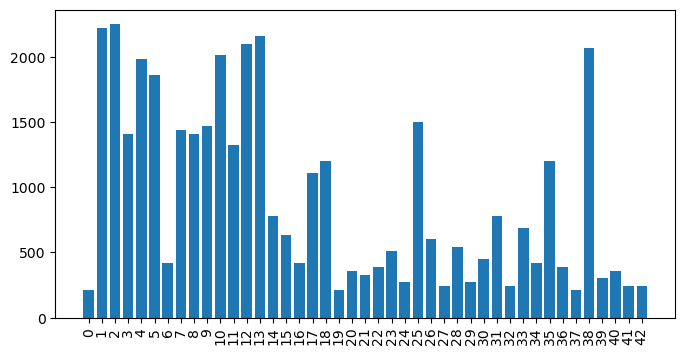

In [6]:
plt.figure(figsize=(8,4))
plt.bar(dic.keys(),dic.values())
plt.xticks(np.arange(0,43,1),rotation = 'vertical')
plt.show()

In [32]:
image_data = []
image_label = []

data_path = "E:/Northeastern Grad Studies/Fall 22 - Semester 1/SML - Prof. Honyang Zang/german_roadsign/Train/"
for i in os.listdir(train_dir):

    for j in os.listdir(train_dir + '/' + str(i)):

        path = "E:/Northeastern Grad Studies/Fall 22 - Semester 1/SML - Prof. Honyang Zang/german_roadsign/Train/" + str(i) + "/" + j

        img = cv2.imread(path)
        img = Image.fromarray(img, 'RGB').resize((64, 64))
        img = np.array(img)

        image_data.append(img)
        image_label.append(i)
        
image_data_64 = np.array(image_data)
image_label_64 = np.array(image_label)

In [206]:
#Saving the Data 
# np.save('image_data',image_data)
# np.save('image_label',image_label)

In [33]:
#saving 64 size image in data 
# np.save('image_data_64',image_data_64)
# np.save('image_label_64',image_label_64)

In [6]:
image_data = np.load("D:/anaconda3/My_Projects/NORTHEASTERN UNIVERSITY (ASSIGNMENTS & OTHER WORK)/SML/CNN SML Project/image_data_64.npy")
image_label = np.load("D:/anaconda3/My_Projects/NORTHEASTERN UNIVERSITY (ASSIGNMENTS & OTHER WORK)/SML/CNN SML Project/image_label_64.npy")

In [7]:
x_train,x_test,y_train,y_test = train_test_split(image_data, image_label,test_size=0.2,random_state=10,stratify=image_label)

In [8]:
pd.DataFrame(y_test).value_counts()

2     450
1     444
13    432
12    420
38    414
10    402
4     396
5     372
25    300
9     294
7     288
3     282
8     282
11    264
18    240
35    240
17    222
14    156
31    156
33    138
15    126
26    120
28    108
23    102
30     90
16     84
6      84
34     84
36     78
22     78
20     72
40     72
21     66
39     60
29     54
24     54
41     48
42     48
32     48
27     48
37     42
19     42
0      42
dtype: int64

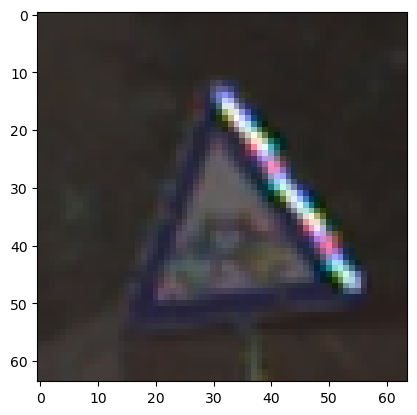

In [9]:
plt.imshow(x_train[0])

In [26]:
# doing onehot encoding of output 
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

x_train = x_train/255
x_test = x_test/255

In [ ]:
#ImageDataGenerator()

In [217]:
# Model building 

In [11]:
model1 = Sequential([
    Conv2D(filters=64,kernel_size=[5,5],activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size=[3,3],activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    
    Flatten(),
    Dense(500, activation='relu'),
    Dropout(0.2),
    Dense(43,activation='softmax')  
])

model1.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy',metrics='accuracy')

In [12]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.10,
    zoom_range=0.15,
    fill_mode='nearest')

In [13]:
model1.fit(datagen.flow(x_train,y_train,batch_size=32),epochs=10,validation_data = (x_test,y_test))

Epoch 1/10
981/981 [==============================] - 257s 261ms/step - loss: 2.2693 - accuracy: 0.4019 - val_loss: 0.9140 - val_accuracy: 0.7081
Epoch 2/10
981/981 [==============================] - 280s 285ms/step - loss: 1.1259 - accuracy: 0.6332 - val_loss: 0.4925 - val_accuracy: 0.8359
Epoch 3/10
981/981 [==============================] - 277s 283ms/step - loss: 0.7315 - accuracy: 0.7630 - val_loss: 1.8605 - val_accuracy: 0.7622
Epoch 4/10
981/981 [==============================] - 274s 280ms/step - loss: 0.5215 - accuracy: 0.8330 - val_loss: 0.1660 - val_accuracy: 0.9484
Epoch 5/10
981/981 [==============================] - 275s 280ms/step - loss: 0.3955 - accuracy: 0.8768 - val_loss: 0.0913 - val_accuracy: 0.9708
Epoch 6/10
981/981 [==============================] - 274s 279ms/step - loss: 0.3236 - accuracy: 0.9010 - val_loss: 0.0897 - val_accuracy: 0.9726
Epoch 7/10
981/981 [==============================] - 271s 276ms/step - loss: 0.3203 - accuracy: 0.9062 - val_loss: 0.0733 -

KeyboardInterrupt: 

In [15]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 64)    4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 64)   0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, None, None, 64)   256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 128)   73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, None, None, 128)  0         
 2D)                                                             
                                                        

In [22]:
y_pred = model1.predict(x_test)
accuracy_score(y_test.argmax(axis=-1),y_pred.argmax(axis=-1))

246/246 [==============================] - 14s 58ms/step


0.976536597806682

In [56]:
f1_score(y_test.argmax(axis=-1),y_pred.argmax(axis=-1),average='weighted')

0.9838156750436964

In [29]:
model1.save('road_sign_detection_with_dataaug')

In [9]:
ss = keras.models.load_model(r'D:\anaconda3\My_Projects\NORTHEASTERN UNIVERSITY (ASSIGNMENTS & OTHER WORK)\SML\CNN SML Project\road_sign_detection')
ss.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                        

In [46]:
y_pred = ss.predict(x_test)
accuracy_score(y_test.argmax(axis=-1),y_pred.argmax(axis=-1))

246/246 [==============================] - 13s 52ms/step


0.9838051517470033

In [48]:
y_test.argmax(axis=-1)

array([41, 26, 14, ...,  2,  6, 13], dtype=int64)

In [50]:
pd.DataFrame(classification_report(y_test.argmax(axis=-1),y_pred.argmax(axis=-1),output_dict = True)).transpose()

,precision,recall,f1-score,support
0,1.000000,0.952381,0.975610,42.000000
1,0.979911,0.988739,0.984305,444.000000
2,1.000000,0.955556,0.977273,450.000000
3,0.946309,1.000000,0.972414,282.000000
4,0.987500,0.997475,0.992462,396.000000
5,0.986034,0.948925,0.967123,372.000000
6,0.954545,1.000000,0.976744,84.000000
7,0.996364,0.951389,0.973357,288.000000
8,0.949324,0.996454,0.972318,282.000000
9,0.993174,0.989796,0.991482,294.000000


In [ ]:
### Testing Data 

In [23]:
test_img_data = []

test_path = "E:/Northeastern Grad Studies/Fall 22 - Semester 1/SML - Prof. Honyang Zang/german_roadsign/Test/"
os.listdir(test_path)

for i in os.listdir(test_path):

    path = test_path+ i
    
    img = cv2.imread(path)
    img = Image.fromarray(img, 'RGB').resize((64, 64))
    img = np.array(img)

    test_img_data.append(img)
    #There could be error bcoz of the a excel file present in the test directory 
    #before runing this code make sure there is no other files except .png files  
    
test_img_data = np.array(test_img_data)
test_img_data = test_img_data/255

In [37]:
test_df = pd.read_csv(r'E:\Northeastern Grad Studies\Fall 22 - Semester 1\SML - Prof. Honyang Zang\german_roadsign\Test.csv')
test_class = np.array(test_df['ClassId'])

In [28]:
np.save('test_img_data',test_img_data)

In [33]:
test_img_data = np.load("D:/anaconda3/My_Projects/NORTHEASTERN UNIVERSITY (ASSIGNMENTS & OTHER WORK)/SML/CNN SML Project/test_img_data.npy")


In [35]:
y_pred_prob = ss.predict(test_img_data)
y_pred = np.argmax(y_pred_prob,axis=-1)

395/395 [==============================] - 21s 52ms/step


In [38]:
accuracy_score(test_class,y_pred)

0.9432304038004751

In [39]:
pd.DataFrame(classification_report(test_class,y_pred, output_dict = True)).transpose()

,precision,recall,f1-score,support
0,1.000000,0.833333,0.909091,60.00000
1,0.928760,0.977778,0.952639,720.00000
2,0.989101,0.968000,0.978437,750.00000
3,0.873767,0.984444,0.925810,450.00000
4,0.989181,0.969697,0.979342,660.00000
5,0.968013,0.912698,0.939542,630.00000
6,0.907801,0.853333,0.879725,150.00000
7,0.978320,0.802222,0.881563,450.00000
8,0.814532,0.946667,0.875642,450.00000
9,0.953252,0.977083,0.965021,480.00000
